In [1]:
!pip install quantecon
!pip install graphviz

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  # set default figure size
import quantecon as qe
import numpy as np
from graphviz import Digraph
import networkx as nx
from matplotlib import cm
import matplotlib as mpl

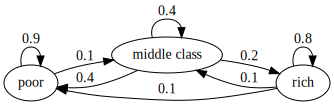

In [3]:
dot = Digraph(comment='Graph')
dot.attr(rankdir='LR')
dot.node("poor")
dot.node("middle class")
dot.node("rich")

dot.edge("poor", "poor", label="0.9")
dot.edge("poor", "middle class", label="0.1")
dot.edge("middle class", "poor", label="0.4")
dot.edge("middle class", "middle class", label="0.4")
dot.edge("middle class", "rich", label="0.2")
dot.edge("rich", "poor", label="0.1")
dot.edge("rich", "middle class", label="0.1")
dot.edge("rich", "rich", label="0.8")

dot

In [4]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

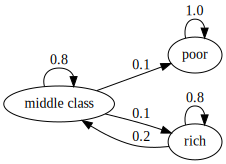

In [5]:
dot = Digraph(comment='Graph')
dot.attr(rankdir='LR')
dot.node("poor")
dot.node("middle class")
dot.node("rich")

dot.edge("poor", "poor", label="1.0")
dot.edge("middle class", "poor", label="0.1")
dot.edge("middle class", "middle class", label="0.8")
dot.edge("middle class", "rich", label="0.1")
dot.edge("rich", "middle class", label="0.2")
dot.edge("rich", "rich", label="0.8")

dot

In [6]:
P = [[1.0, 0.0, 0.0],
     [0.1, 0.8, 0.1],
     [0.0, 0.2, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

False

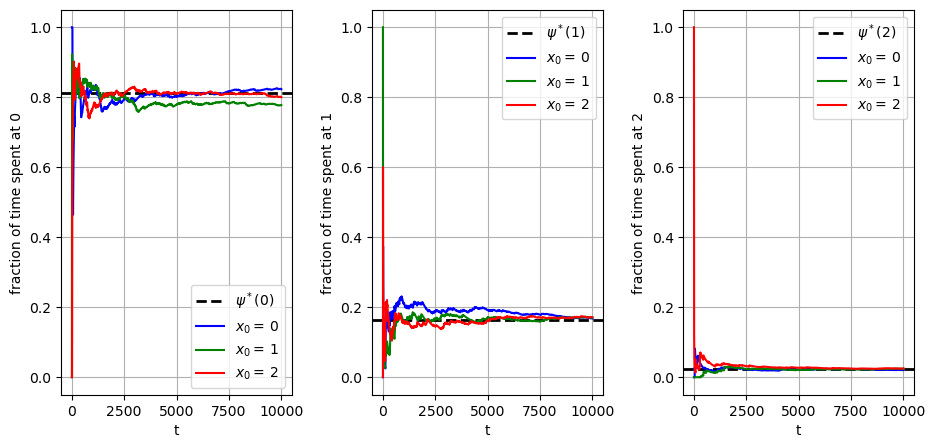

In [7]:
P = np.array([[0.971, 0.029, 0.000],
              [0.145, 0.778, 0.077],
              [0.000, 0.508, 0.492]])
ts_length = 10_000
mc = qe.MarkovChain(P)
n = len(P)
fig, axes = plt.subplots(nrows=1, ncols=n)
ψ_star = mc.stationary_distributions[0]
plt.subplots_adjust(wspace=0.35)

for i in range(n):
    axes[i].grid()
    axes[i].axhline(ψ_star[i], linestyle='dashed', lw=2, color = 'black', 
                    label = fr'$\psi^*({i})$')
    axes[i].set_xlabel('t')
    axes[i].set_ylabel(f'fraction of time spent at {i}')

    # Compute the fraction of time spent, starting from different x_0s
    for x0, col in ((0, 'blue'), (1, 'green'), (2, 'red')):
        # Generate time series that starts at different x0
        X = mc.simulate(ts_length, init=x0)
        X_bar = (X == i).cumsum() / (1 + np.arange(ts_length, dtype=float))
        axes[i].plot(X_bar, color=col, label=f'$x_0 = \, {x0} $')
    axes[i].legend()
plt.show()

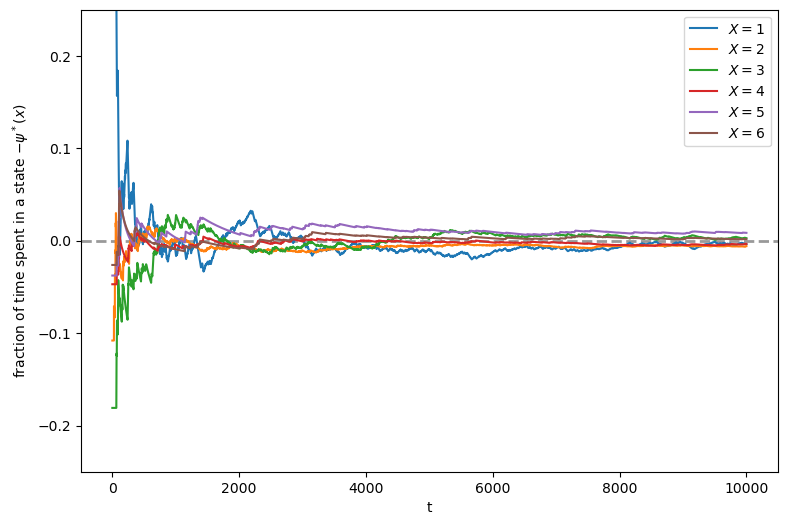

In [8]:
P = [[0.86, 0.11, 0.03, 0.00, 0.00, 0.00],
     [0.52, 0.33, 0.13, 0.02, 0.00, 0.00],
     [0.12, 0.03, 0.70, 0.11, 0.03, 0.01],
     [0.13, 0.02, 0.35, 0.36, 0.10, 0.04],
     [0.00, 0.00, 0.09, 0.11, 0.55, 0.25],
     [0.00, 0.00, 0.09, 0.15, 0.26, 0.50]]

ts_length = 10_000
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
fig, ax = plt.subplots(figsize=(9, 6))
X = mc.simulate(ts_length)
# Center the plot at 0
ax.set_ylim(-0.25, 0.25)
ax.axhline(0, linestyle='dashed', lw=2, color = 'black', alpha=0.4)


for x0 in range(6):
    # Calculate the fraction of time for each state
    X_bar = (X == x0).cumsum() / (1 + np.arange(ts_length, dtype=float))
    ax.plot(X_bar - ψ_star[x0], label=f'$X = {x0+1} $')
    ax.set_xlabel('t')
    ax.set_ylabel(r'fraction of time spent in a state $- \psi^* (x)$')

ax.legend()
plt.show()

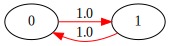

In [9]:
dot = Digraph(comment='Graph')
dot.attr(rankdir='LR')
dot.node("0")
dot.node("1")

dot.edge("0", "1", label="1.0", color='red')
dot.edge("1", "0", label="1.0", color='red')

dot

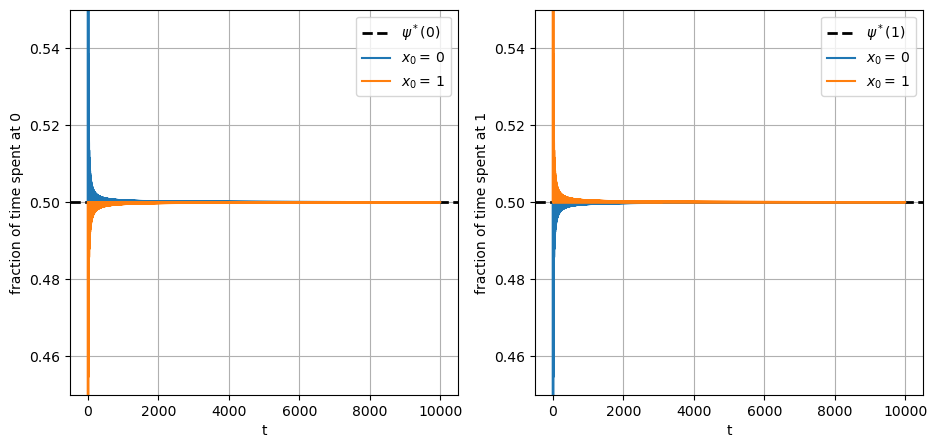

In [10]:
P = np.array([[0, 1],
              [1, 0]])
ts_length = 10_000
mc = qe.MarkovChain(P)
n = len(P)
fig, axes = plt.subplots(nrows=1, ncols=n)
ψ_star = mc.stationary_distributions[0]

for i in range(n):
    axes[i].grid()
    axes[i].set_ylim(0.45, 0.55)
    axes[i].axhline(ψ_star[i], linestyle='dashed', lw=2, color = 'black', 
                    label = fr'$\psi^*({i})$')
    axes[i].set_xlabel('t')
    axes[i].set_ylabel(f'fraction of time spent at {i}')

    # Compute the fraction of time spent, for each x
    for x0 in range(n):
        # Generate time series starting at different x_0
        X = mc.simulate(ts_length, init=x0)
        X_bar = (X == i).cumsum() / (1 + np.arange(ts_length, dtype=float))
        axes[i].plot(X_bar, label=f'$x_0 = \, {x0} $')

    axes[i].legend()
plt.show()

In [11]:
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.22,  0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.21,  0.194, 0.09,  0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.04,  0.009],
     [0.175, 0.178, 0.197, 0.207, 0.11,  0.067, 0.054, 0.012],
     [0.182, 0.184, 0.2,   0.205, 0.106, 0.062, 0.05,  0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.17,  0.143, 0.121, 0.028]]

P = np.array(P)
codes_B = ('1','2','3','4','5','6','7','8')

np.linalg.matrix_power(P, 10)

array([[0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802]])

In [12]:
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ψ_star

array([0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
       0.0503871 , 0.03932382, 0.00858802])

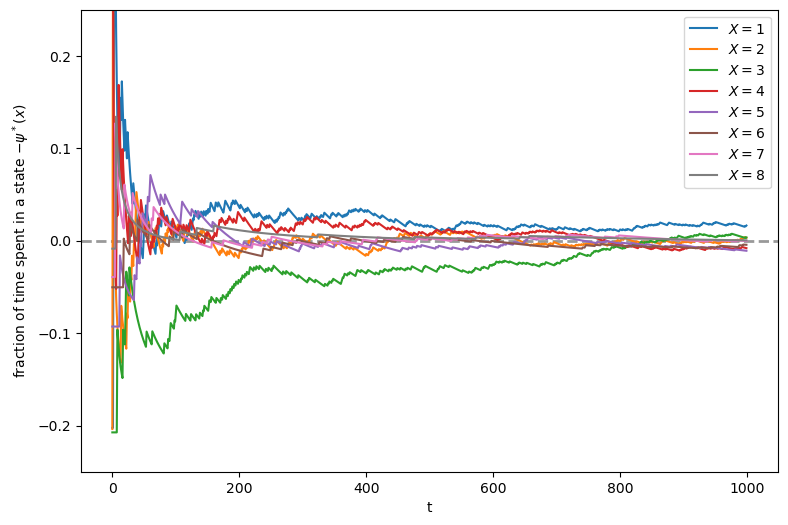

In [13]:
ts_length = 1000
mc = qe.MarkovChain(P)
fig, ax = plt.subplots(figsize=(9, 6))
X = mc.simulate(ts_length)
ax.set_ylim(-0.25, 0.25)
ax.axhline(0, linestyle='dashed', lw=2, color = 'black', alpha=0.4)

for x0 in range(8):
    # Calculate the fraction of time for each worker
    X_bar = (X == x0).cumsum() / (1 + np.arange(ts_length, dtype=float))
    ax.plot(X_bar - ψ_star[x0], label=f'$X = {x0+1} $')
    ax.set_xlabel('t')
    ax.set_ylabel(r'fraction of time spent in a state $- \psi^* (x)$')

ax.legend()
plt.show()

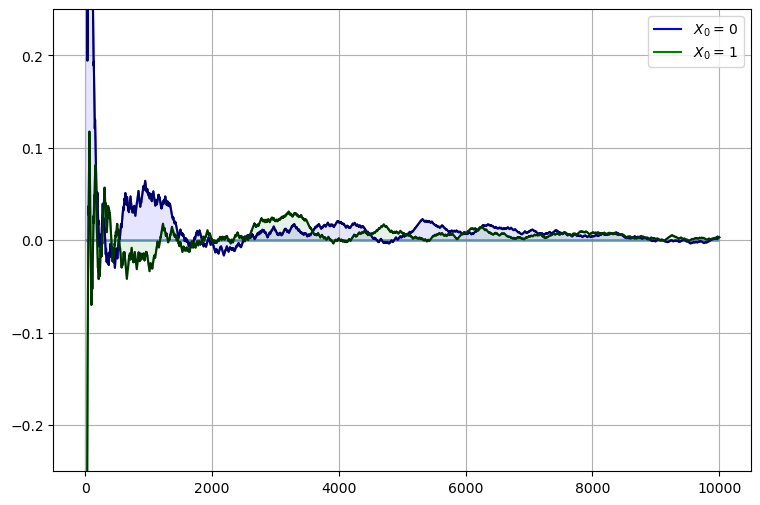

In [14]:
α = β = 0.1
ts_length = 10000
p = β / (α + β)

P = ((1 - α,       α),               # Careful: P and p are distinct
     (    β,   1 - β))
mc = qe.MarkovChain(P)

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_ylim(-0.25, 0.25)
ax.grid()
ax.hlines(0, 0, ts_length, lw=2, alpha=0.6)   # Horizonal line at zero

for x0, col in ((0, 'blue'), (1, 'green')):
    # Generate time series for worker that starts at x0
    X = mc.simulate(ts_length, init=x0)
    # Compute fraction of time spent unemployed, for each n
    X_bar = (X == 0).cumsum() / (1 + np.arange(ts_length, dtype=float))
    # Plot
    ax.fill_between(range(ts_length), np.zeros(ts_length), X_bar - p, color=col, alpha=0.1)
    ax.plot(X_bar - p, color=col, label=f'$X_0 = \, {x0} $')
    # Overlay in black--make lines clearer
    ax.plot(X_bar - p, 'k-', alpha=0.6)

ax.legend(loc='upper right')
plt.show()

In [15]:
def is_irreducible(P):
    n = len(P)
    result = np.zeros((n, n))
    for i in range(n):
        result += np.linalg.matrix_power(P, i)
    return np.all(result > 0)

In [16]:
P1 = np.array([[0, 1],
               [1, 0]])
P2 = np.array([[1.0, 0.0, 0.0],
               [0.1, 0.8, 0.1],
               [0.0, 0.2, 0.8]])
P3 = np.array([[0.971, 0.029, 0.000],
               [0.145, 0.778, 0.077],
               [0.000, 0.508, 0.492]])

for P in (P1, P2, P3):
    result = lambda P: 'irreducible' if is_irreducible(P) else 'reducible'
    print(f'{P}: {result(P)}')

[[0 1]
 [1 0]]: irreducible
[[1.  0.  0. ]
 [0.1 0.8 0.1]
 [0.  0.2 0.8]]: reducible
[[0.971 0.029 0.   ]
 [0.145 0.778 0.077]
 [0.    0.508 0.492]]: irreducible
